## 1. Download data

url: https://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip

## 2. Import library and read data

In [111]:
import pandas as pd
import numpy as np
df = pd.read_excel('data/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Exploration

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [113]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [114]:
df.isnull().sum() # check missing value

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Visualize

In [115]:
import os
def savefig(figure, filename):
    if not os.path.exists('images'):
        os.makedirs('images')
    filename = f'images/{filename}'
    figure.savefig(filename)

In [116]:
import matplotlib.pyplot as plt

In [117]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [118]:
df["year_transaction"] = df["X1 transaction date"].apply(lambda x : ''.join(list(str(x)[:4])))

In [119]:
df[df["year_transaction"]=="2012"]["Y house price of unit area"].describe()

count    126.000000
mean      36.304762
std       12.484915
min       11.600000
25%       25.975000
50%       37.600000
75%       45.375000
max       71.000000
Name: Y house price of unit area, dtype: float64

In [120]:
df[df["year_transaction"]=="2013"]["Y house price of unit area"].describe()

count    288.000000
mean      38.713194
std       14.026954
min        7.600000
25%       28.700000
50%       39.050000
75%       47.025000
max      117.500000
Name: Y house price of unit area, dtype: float64

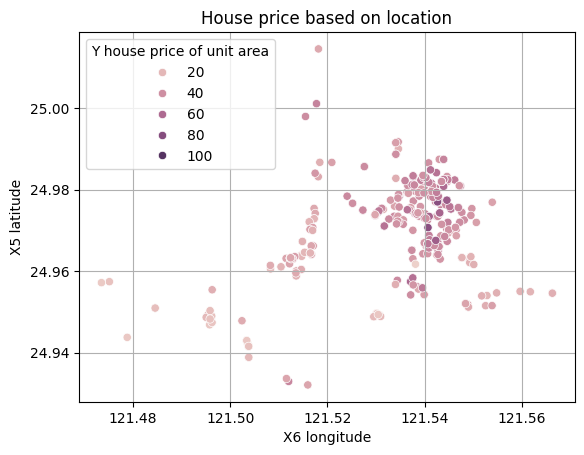

In [121]:
import seaborn as sns
sns.scatterplot(data = df, x = 'X6 longitude', y = 'X5 latitude', hue = 'Y house price of unit area')
plt.title('House price based on location')
savefig(plt, 'House price based on location.png')
plt.grid(True)
plt.show()

In [122]:
# drop outliers
df = df[df['X5 latitude'] <= 25]

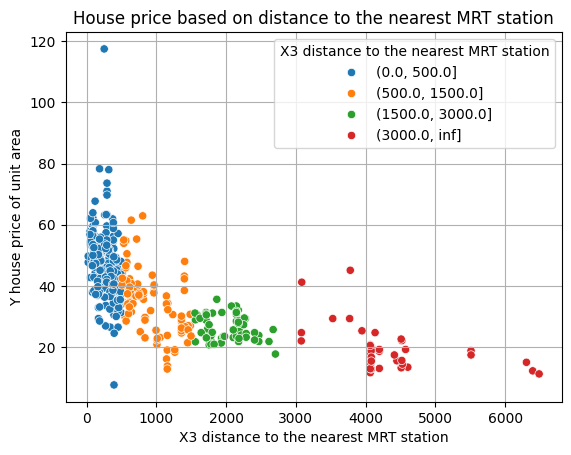

In [123]:
bins = [0, 500, 1500, 3000, np.infty]
sns.scatterplot(
    data=df,
    x="X3 distance to the nearest MRT station",
    y="Y house price of unit area",
    hue=pd.cut(df['X3 distance to the nearest MRT station'], bins=bins)
)
plt.title('House price based on distance to the nearest MRT station')
plt.grid(True)
savefig(plt, 'House price based on distance to the nearest MRT station.png')
plt.show()

In [124]:
# drop outliers
df = df[df['Y house price of unit area'] <= 110]

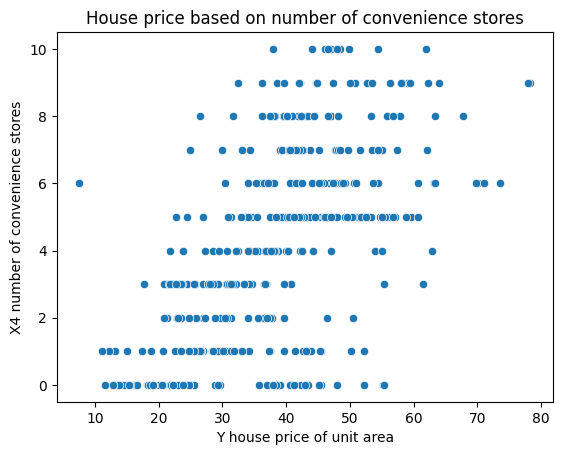

In [125]:
sns.scatterplot(data=df, y='X4 number of convenience stores', x='Y house price of unit area')
plt.title('House price based on number of convenience stores')
savefig(plt, 'House price based on number of convenience stores.png')
plt.show()

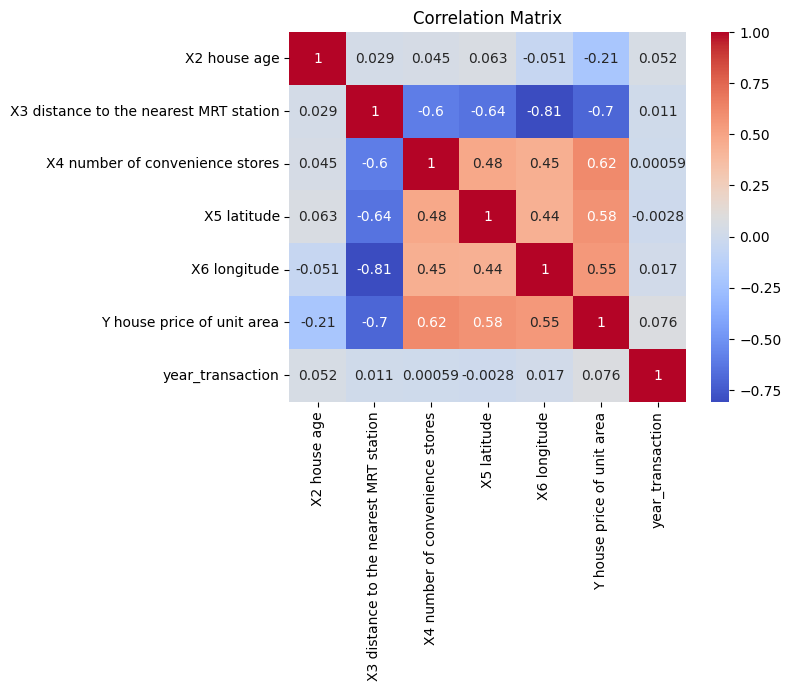

In [126]:
# make corr matrix
corr_matrix = df.corr()
# plot corr matrix
# remove attributes: "No", "X1 transaction date"
corr_matrix = df.drop(['No', 'X1 transaction date'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
savefig(plt, 'correlation_matrix.png')
plt.show()

## Data Preprocessing And Feature Engineer

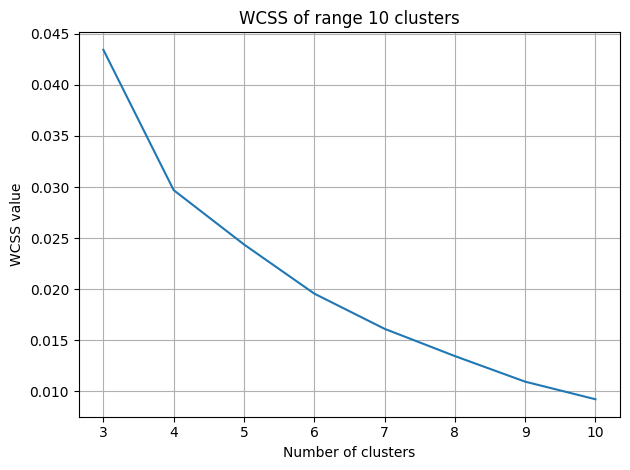

In [127]:
# clustering location
from sklearn.cluster import KMeans

wcss = []
for K in range(3,11):
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df[['X6 longitude', 'X5 latitude']])
    wcss.append(kmeans.inertia_)

# plot WCSS
plt.plot(range(3, 11), wcss)
plt.title('WCSS of range 10 clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.grid(True)
plt.tight_layout()
savefig(plt, 'WCSS.png')
plt.show()

Chọn 4 là K clusters

In [128]:
K = 4

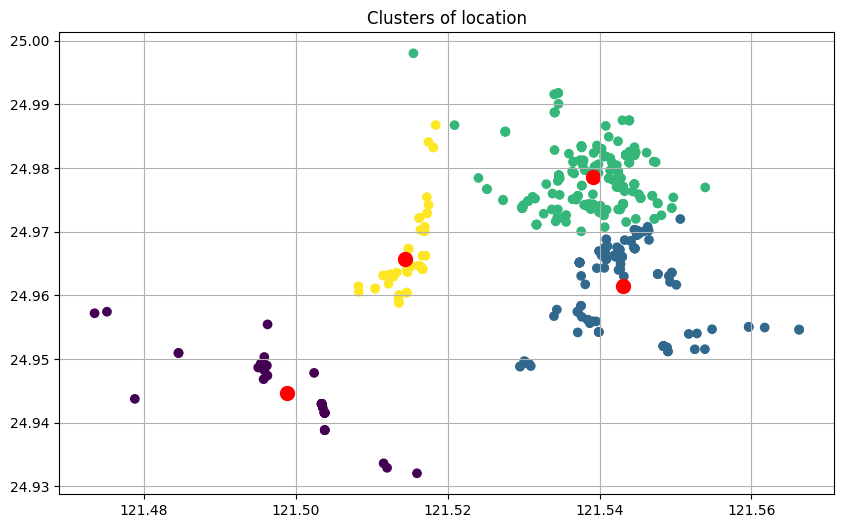

In [129]:
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df[['X6 longitude', 'X5 latitude']])
clusters = kmeans.cluster_centers_
# plot clusters
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(df['X6 longitude'], df['X5 latitude'], c=kmeans.labels_)
plt.scatter(clusters[:, 0], clusters[:, 1], s=100, c='red')
plt.title('Clusters of location')
savefig(plt, 'clusters.png')
plt.show()

In [130]:
print(clusters) # make sure the cluster is ascending

[[121.49886194  24.94463833]
 [121.54312612  24.96150033]
 [121.53909387  24.97850317]
 [121.51432982  24.965772  ]]


In [131]:
# add clusters to df
df['clusters'] = kmeans.labels_

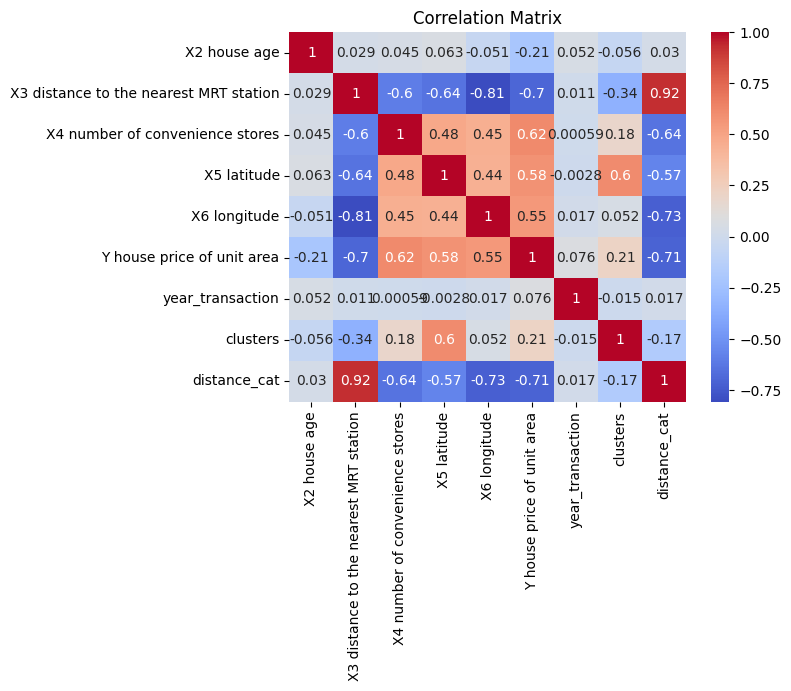

In [148]:
# make corr matrix
corr_matrix = df.corr()
# plot corr matrix
# remove attributes: "No", "X1 transaction date"
corr_matrix = df.drop(['No', 'X1 transaction date'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# savefig(plt, 'correlation_matrix.png')
plt.show()

In [147]:
# make a new feature of distance to the nearest MRT station
df['distance_cat'] = pd.cut(df['X3 distance to the nearest MRT station'], bins=bins, labels=['0', '1', '2', '3'])

In [134]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'year_transaction', 'clusters',
       'distance_cat'],
      dtype='object')

In [156]:
# Select features
num_features = ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'clusters', "distance_cat"]
cat_features = []

X = df[num_features + cat_features]
y = df['Y house price of unit area']
# preprocessing data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ("onehot_encoder", OneHotEncoder())
])

num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [157]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')

Train size: 328
Test size: 83


In [158]:
X_train_prep = preprocessing_pipeline.fit_transform(X_train)
X_test_prep = preprocessing_pipeline.transform(X_test)

## Train a Regression model

In [159]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(random_state=42),
    SVR(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.5)
]

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def generate_baseline_results(models, X, y, metrics, cv = 5, plot_results = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = -cross_val_score(model, X, y, scoring=metrics, cv=5)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_results = pd.DataFrame(entries, columns=['model_name', 'fold_idx', metrics])
    if plot_results:
        sns.boxplot(data=cv_results, x='model_name', y=metrics, showmeans = True)
        plt.title("Boxplot of models")
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45)
        savefig(plt, 'boxplot.png')
        plt.show()
    mean = cv_results.groupby('model_name')[metrics].mean()
    std = cv_results.groupby('model_name')[metrics].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean of RMSE', 'Standard Deviation']

    # sort by mean
    baseline_results.sort_values(by = ['Mean of RMSE'], ascending=True, inplace = True)
    return baseline_results

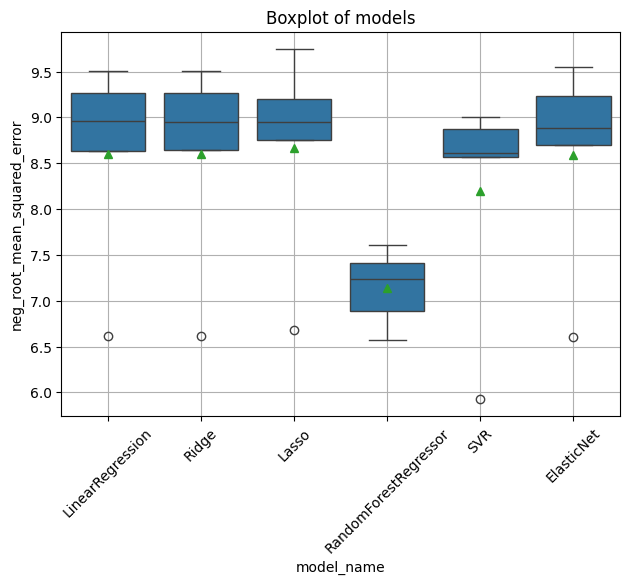

,Mean of RMSE,Standard Deviation
model_name,,
RandomForestRegressor,7.143727,0.417917
SVR,8.200430,1.281368
ElasticNet,8.594869,1.160221
Ridge,8.597955,1.154867
LinearRegression,8.598630,1.154405
Lasso,8.667578,1.169205


In [161]:
generate_baseline_results(models, X_train_prep, y_train, cv = 5, metrics = 'neg_root_mean_squared_error', plot_results=True)

## Fine Tuning

Model RandomForest Regressor is chosen for fine tunning

In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 50, 100, 200, 300, 500],
    "max_depth": [10, 50],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200, 500],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [163]:
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## Evaluate Model on the Test set

In [164]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(X_test_prep)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 52.392673427775435, R2: 0.6696957119329139
